## Test on BRCA data

In [1]:
# Required to correctly display interactive (dynamic) plots in Jupyter notebooks
%matplotlib notebook
# For Jupyter Lab instead
# %matplotlib ipympl
import seaborn as sns

Set the main folder

In [2]:
import os
import pandas as pd
import numpy as np
print(os.getcwd())

C:\Users\lucacat\JupyterProjects\fdd_brca_pilot


### Data preparation

Load gene expression of breast cancer samples from the cohort 

In [3]:
data = pd.read_csv('sw_breast_gdat_2.csv')
data.pop('Unnamed: 0')

0              F1
1              F2
2              F3
3              F4
4              F5
          ...    
3064    F2912repl
3065    F2958repl
3066    F3057repl
3067    F3085repl
3068    F3135repl
Name: Unnamed: 0, Length: 3069, dtype: object

In [4]:
print(data.shape)

(3069, 30866)


In [5]:
data.iloc[:,0:10].head()

,5_8S_rRNA,5S_rRNA,6M1-18,7M1-2,7SK,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1
0,-3.321928,4.911099,-3.321928,-3.321928,-0.539253,0.598115,-1.352525,-3.213583,6.172477,-1.584899
1,-3.321928,-3.321928,-3.321928,-3.321928,-0.576620,2.363673,-0.779430,-3.054421,7.113514,-2.329463
2,-3.321928,-3.321928,-3.321928,-3.321928,-1.651323,2.647738,0.085410,-3.321928,5.641996,-2.221576
3,-3.321928,3.656393,-3.321928,-3.321928,0.126633,1.378576,-0.334324,-3.321928,7.236769,-1.412293
4,-3.321928,4.190104,-3.321928,-3.321928,0.783715,2.759643,0.984849,-3.321928,7.508171,-0.135133


<IPython.core.display.Javascript object>


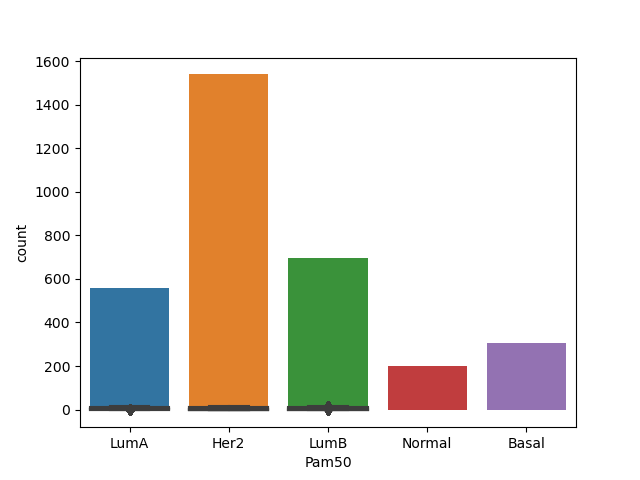

<AxesSubplot:>

In [6]:
X = data.loc[:,["ESR1","PGR","ERBB2"]]
sns.boxplot(data = X)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaledX = scaler.fit_transform(X)
sns.boxplot(data = scaledX)

<AxesSubplot:>

Read pheno

In [8]:
pheno = pd.read_csv('sw_breast_pheno.csv')
pheno.pop('Unnamed: 0')

0              F1
1              F2
2              F3
3              F4
4              F5
          ...    
3064    F2912repl
3065    F2958repl
3066    F3057repl
3067    F3085repl
3068    F3135repl
Name: Unnamed: 0, Length: 3069, dtype: object

In [9]:
print(pheno.shape)
pheno.head()

(3069, 33)


,Sample_geo_accession,Sample_status,Sample_submission_date,Sample_last_update_date,Sample_type,Sample_channel_count,Sample_source_name_ch1,Sample_organism_ch1,Sample_characteristics_ch1,Sample_characteristics_ch1.1,...,Sample_characteristics_ch1.8,Sample_characteristics_ch1.9,Sample_characteristics_ch1.10,Sample_characteristics_ch1.11,Sample_characteristics_ch1.12,Pam50,SurvDays,OverallSurv,Endocrine_treat,chemo
0,GSM2528079,Public on Mar 12 2018,Mar 09 2017,Mar 12 2018,SRA,1,Primary breast tumor,Homo sapiens,Q008818.C008840.S000215.l.r.m2.c.lib.g.k.a.t,instrument model: HiSeq 2000,...,nhg prediction mgc: G3,er prediction sgc: 0,pgr prediction sgc: 0,her2 prediction sgc: 0,ki67 prediction sgc: 1,Basal,2367,0,0.0,1.0
1,GSM2528080,Public on Mar 12 2018,Mar 09 2017,Mar 12 2018,SRA,1,Primary breast tumor,Homo sapiens,Q008769.C008792.S000250.l.r.m.c.lib.g.k.a.t,instrument model: HiSeq 2000,...,nhg prediction mgc: G2,er prediction sgc: 1,pgr prediction sgc: 1,her2 prediction sgc: 0,ki67 prediction sgc: 0,LumA,2367,0,1.0,1.0
2,GSM2528081,Public on Mar 12 2018,Mar 09 2017,Mar 12 2018,SRA,1,Primary breast tumor,Homo sapiens,Q008568.C008577.S000424.l.r.m3.c.lib.g.k.a.t,instrument model: HiSeq 2000,...,nhg prediction mgc: G3,er prediction sgc: 1,pgr prediction sgc: 1,her2 prediction sgc: 0,ki67 prediction sgc: 1,LumB,2168,1,1.0,1.0
3,GSM2528082,Public on Mar 12 2018,Mar 09 2017,Mar 12 2018,SRA,1,Primary breast tumor,Homo sapiens,Q008909.C009000.S000084.l.r.m.c.lib.g.k.a.t,instrument model: HiSeq 2000,...,nhg prediction mgc: G3,er prediction sgc: 1,pgr prediction sgc: 1,her2 prediction sgc: 1,ki67 prediction sgc: 1,LumA,2416,0,1.0,1.0
4,GSM2528083,Public on Mar 12 2018,Mar 09 2017,Mar 12 2018,SRA,1,Primary breast tumor,Homo sapiens,Q008781.C008782.S000260.l.r.m.c.lib.g.k.a.t,instrument model: HiSeq 2000,...,nhg prediction mgc: G2,er prediction sgc: 1,pgr prediction sgc: 1,her2 prediction sgc: 0,ki67 prediction sgc: 0,Normal,2389,0,1.0,0.0


Load TCGA breast cancer data

In [10]:
tcga = pd.read_csv('tcga_breast_gdat_0.csv')
tcgap = pd.read_csv('tcga_breast_pheno_0.csv')

In [11]:
print(tcga.shape)
print(tcgap.shape)

(1081, 20502)
(1081, 26)


In [12]:
if 'Unnamed: 0' in tcga.columns:
    print(tcga['Unnamed: 0'])

0       TCGA.3C.AAAU.01A.11R.A41B.07
1       TCGA.3C.AALI.01A.11R.A41B.07
2       TCGA.3C.AALJ.01A.31R.A41B.07
3       TCGA.3C.AALK.01A.11R.A41B.07
4       TCGA.4H.AAAK.01A.12R.A41B.07
                    ...             
1076    TCGA.WT.AB44.01A.11R.A41B.07
1077    TCGA.XX.A899.01A.11R.A36F.07
1078    TCGA.XX.A89A.01A.11R.A36F.07
1079    TCGA.Z7.A8R5.01A.42R.A41B.07
1080    TCGA.Z7.A8R6.01A.11R.A41B.07
Name: Unnamed: 0, Length: 1081, dtype: object


In [13]:
tcga=tcga.drop('Unnamed: 0', axis=1, errors='ignore')

In [14]:
Z = tcga.loc[:,["ESR1","PGR","ERBB2"]]
sns.boxplot(data = Z)

<AxesSubplot:>

In [15]:
scaler = StandardScaler()
scaledZ = scaler.fit_transform(Z)
sns.boxplot(data = scaledZ)

<AxesSubplot:>

In [16]:
if 'Unnamed: 0' in tcgap.columns:
    tcgap.pop('Unnamed: 0')

In [17]:
tcgap.head()

,patient,Tumor.Type,Included_in_previous_marker_papers,vital_status,days_to_birth,days_to_death,days_to_last_followup,age_at_initial_pathologic_diagnosis,pathologic_stage,Tumor_Grade,...,CNV.Clusters,Mutation.Clusters,DNA.Methylation.Clusters,mRNA.Clusters,miRNA.Clusters,lncRNA.Clusters,Protein.Clusters,PARADIGM.Clusters,Pan.Gyn.Clusters,OverallSurv
0,TCGA-3C-AAAU,BRCA,NO,Alive,-20211.0,NaN,4047.0,55,NaN,NaN,...,C6,C7,C1,C1,C3,NaN,NaN,C5,NaN,0
1,TCGA-3C-AALI,BRCA,NO,Alive,-18538.0,NaN,4005.0,50,Stage_II,NaN,...,C6,C9,C2,C2,C3,NaN,C2,C4,C4,0
2,TCGA-3C-AALJ,BRCA,NO,Alive,-22848.0,NaN,1474.0,62,Stage_II,NaN,...,C6,C4,C2,C2,C2,NaN,NaN,C4,NaN,0
3,TCGA-3C-AALK,BRCA,NO,Alive,-19074.0,NaN,1448.0,52,Stage_I,NaN,...,C1,C5,C2,C2,C2,NaN,C2,C6,C4,0
4,TCGA-4H-AAAK,BRCA,NO,Alive,-18371.0,NaN,348.0,50,Stage_III,NaN,...,C6,C4,C1,C2,C2,NaN,C2,C6,C1,0


#### Define the PAM 50 signatures

Define the list of PAM50 genes
The list does not contain 'ORC6L', 'KNTC2', 'CDCA1'

In [18]:
pam50sig = ["ACTR3B","ANLN","BAG1","BCL2","BIRC5","BLVRA","CCNB1","CCNE1","CDC20","CDC6","CDH3","CENPF","CEP55","CXXC5","EGFR","ERBB2","ESR1","EXO1","FGFR4","FOXA1","FOXC1","GPR160","GRB7","KIF2C","KRT14","KRT17","KRT5","MAPT","MDM2","MELK","MIA","MKI67","MLPH","MMP11","MYBL2","MYC","NAT1","PGR","PHGDH","PTTG1","RRM2","SFRP1","SLC39A6","TMEM45B","TYMS","UBE2C","UBE2T"]

In [19]:
len(pam50sig)

47

#### Check and convert class labels (breast cancer subtypes)

Barplot showing the number of samples available for each class

In [20]:
sns.countplot(x = 'pam50', data=data)

<AxesSubplot:xlabel='pam50', ylabel='count'>

In [21]:
sns.countplot(x='Pam50', data=tcgap)

<AxesSubplot:xlabel='Pam50', ylabel='count'>

In [22]:
data['pam50'].dtypes

dtype('O')

In [23]:
pam50 = data['pam50']
data.pop('pam50')

0        Basal
1         LumA
2         LumB
3         LumA
4       Normal
         ...  
3064      LumA
3065      Her2
3066      LumA
3067      LumB
3068     Basal
Name: pam50, Length: 3069, dtype: object

In [24]:
data.shape

(3069, 30865)

Mapping class labels to indexes

In [25]:
class2idx = {
    'LumA':0,
    'LumB':1,
    'Her2':2,
    'Basal':3,
    'Normal':4
}

idx2class = {v: k for k, v in class2idx.items()}

In [26]:
import collections
counter=collections.Counter(pam50)
print(counter)

Counter({'LumA': 1540, 'LumB': 695, 'Basal': 325, 'Her2': 307, 'Normal': 202})


In [27]:
# replacing labels
pam50.replace(class2idx, inplace=True)

In [28]:
# checking the counts again
counter=collections.Counter(pam50)
print(counter)

Counter({0: 1540, 1: 695, 3: 325, 2: 307, 4: 202})


In [29]:
pam50t = tcgap['Pam50']

In [30]:
counter=collections.Counter(pam50t)
print(counter)

Counter({'LumA': 560, 'LumB': 209, 'Basal': 190, 'Her2': 82, 'Normal': 40})


In [31]:
pam50t.replace(class2idx, inplace=True)

In [32]:
counter=collections.Counter(pam50t)
print(counter)

Counter({0: 560, 1: 209, 3: 190, 2: 82, 4: 40})


#### Remove zero-variance features

In [33]:
from sklearn.feature_selection import VarianceThreshold
zv_sel_data = VarianceThreshold(0)
zv_sel_tcga = VarianceThreshold(0)

In [34]:
print(data.shape)
print(tcga.shape)

(3069, 30865)
(1081, 20501)


In [35]:
zv_sel_data.fit_transform(data)
zv_sel_tcga.fit_transform(tcga)

array([[ 7.63001006,  0.        ,  0.        , ..., 10.2063508 ,
         1.44535592,  0.        ],
       [ 7.89714602,  0.        ,  0.        , ...,  8.67151559,
         9.85734423,  0.        ],
       [ 8.72872528,  0.9310022 ,  0.        , ...,  8.99582226,
         5.1842049 ,  0.        ],
       ...,
       [ 8.00075834,  1.7492339 ,  1.27327716, ...,  9.89891589,
         7.88410029,  0.95954761],
       [ 8.7831374 ,  0.        ,  0.6756353 , ...,  9.55426037,
         7.90645291,  0.        ],
       [ 7.96189589,  0.        ,  0.        , ...,  8.85522356,
         4.45144852,  0.        ]])

In [36]:
data0 = data[data.columns[zv_sel_data.get_support()]]
tcga0 = tcga[tcga.columns[zv_sel_tcga.get_support()]]

In [37]:
print(data0.shape)
print(tcga0.shape)

(3069, 28567)
(1081, 20204)


#### Filter out features based on the F-statistics

In [38]:
common_feats = list(set.intersection(set(data.columns), set(tcga.columns)))
len(common_feats)

18603

In [39]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
f_selector_data = make_pipeline(StandardScaler(), SelectKBest(f_classif, k = 15000))
f_selector_tcga = make_pipeline(StandardScaler(), SelectKBest(f_classif, k = 15000))

In [40]:
f_selector_data.fit_transform(data0, pam50)

array([[-2.29869169, -2.74919459, -1.09841316, ..., -0.27716157,
        -1.18323666, -1.95593208],
       [ 0.10497679, -1.72293081,  0.11011345, ...,  1.3996433 ,
        -1.20344702, -1.05244006],
       [ 0.49170881, -0.17422973, -1.77968318, ...,  0.48137025,
        -0.64158739, -0.94282488],
       ...,
       [-1.18160658, -0.21087259,  1.53574565, ...,  0.15638902,
         2.1050135 ,  1.80271047],
       [ 1.56653281, -0.05901593, -2.76990987, ..., -3.31925184,
        -1.46496672, -1.26685498],
       [-1.08738647, -0.99097651,  1.3486449 , ...,  1.30640229,
        -1.8278978 ,  1.83119411]])

In [41]:
f_selector_tcga.fit_transform(tcga0, pam50t)

array([[ 0.43135856, -0.65556778, -0.9730228 , ...,  1.24936314,
        -2.2972226 , -0.23262364],
       [ 0.66112829, -0.3046976 , -0.58730611, ...,  0.35656676,
         1.75067938, -0.23262364],
       [ 1.37638856, -1.03062952, -0.36345541, ..., -0.46915258,
        -0.49806482, -0.23262364],
       ...,
       [ 0.75024761,  0.71738362,  0.58970395, ...,  0.5688892 ,
         0.80114191,  2.7036072 ],
       [ 1.42318966, -0.50229396,  1.69947982, ..., -1.01796704,
         0.81189813, -0.23262364],
       [ 0.71682113, -0.31905032, -0.63244171, ..., -1.73176402,
        -0.85067183, -0.23262364]])

In [42]:
selected_feat_data = data0.columns[f_selector_data['selectkbest'].get_support()]
len(selected_feat_data)

15000

In [43]:
selected_feat_tcga = tcga0.columns[f_selector_tcga['selectkbest'].get_support()]
len(selected_feat_tcga)

15000

#### Select common features

How many in common?

In [44]:
common_feats = list(set.intersection(set(selected_feat_data), set(selected_feat_tcga)))
len(common_feats)

11241

In [45]:
print(len(list(set.intersection(set(selected_feat_data), set(pam50sig)))))
print(len(list(set.intersection(set(selected_feat_tcga), set(pam50sig)))))

47
47


In [46]:
print(len(list(set.intersection(set.intersection(set(selected_feat_data), set(selected_feat_tcga)),set(pam50sig)))))

47


In [47]:
biomarker_list = list(set.intersection(set.intersection(set(selected_feat_data), set(selected_feat_tcga)),set(pam50sig)))
print(len(biomarker_list))

47


#### Define the datasets

In [48]:
X_data = data[common_feats]
X_data.shape

(3069, 11241)

In [49]:
X_tcga = tcga[common_feats]
X_tcga.shape

(1081, 11241)

Merge the two datasets

In [50]:
X_tot = pd.concat([X_data, X_tcga])
X_tot.shape

(4150, 11241)

Merge the two class vectors

In [51]:
print(len(pam50))
print(len(pam50t))

3069
1081


In [52]:
print(type(pam50))
print(type(pam50t))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [53]:
Y_tot = pd.concat([pam50, pam50t]) 
Y_tot.reset_index(inplace = True, drop = True)
print(len(Y_tot))
print(type(Y_tot))
print(Y_tot.head())

4150
<class 'pandas.core.series.Series'>
0    3
1    0
2    1
3    0
4    4
dtype: int64


### Now we use the river framework

Load modules from **sklearn**

In [54]:
import sklearn as sk
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import ElasticNetCV
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

Load modules from **river**

In [55]:
import random
from river import stream
from river import linear_model
from river import metrics
from river import multiclass
from river import preprocessing
from river import optim
from river.drift import ADWIN
from river.drift import PageHinkley
from river import feature_selection
from river import tree
from river.multiclass import OneVsRestClassifier
from river.utils import dict2numpy
from river import ensemble
from river import neighbors
import warnings
warnings.filterwarnings('ignore')

Define utility functions

In [56]:
dict_filter = lambda x, y: dict([ (i,x[i]) for i in x if i in set(y) ])

Check the scaling process

In [57]:
len(biomarker_list)

47

In [58]:
scaler = preprocessing.StandardScaler()

C = 0
X_scal = np.zeros(shape=(X_tot.shape[0],len(biomarker_list)))
for xi, yi in stream.iter_pandas(X_tot):
    xi = dict_filter(xi, biomarker_list)
    xi_scaled = scaler.learn_one(xi).transform_one(xi)
    X_scal[C] = dict2numpy(xi_scaled)
    C = C + 1

In [59]:
provola = pd.DataFrame(X_scal)
provola = provola.set_axis(biomarker_list, axis=1)
provola.head()

,MMP11,TMEM45B,TYMS,ACTR3B,ANLN,BAG1,CENPF,MELK,FOXC1,MDM2,...,PGR,FOXA1,EGFR,CDC6,NAT1,BIRC5,CEP55,GRB7,ESR1,SLC39A6
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.000000,-1.000000,1.000000,1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,-1.000000,-1.000000,1.000000
2,-0.343126,1.048983,-0.250263,0.328440,1.140209,-0.902187,1.392565,0.049611,-0.309551,0.670914,...,0.357357,0.792914,1.158658,1.278067,-1.211141,0.043130,1.409190,1.243135,1.143153,1.334442
3,-0.740358,0.730592,1.044053,0.972399,-0.707744,1.127230,0.014513,-0.608407,-1.436465,1.414043,...,0.320885,-0.448866,-0.482157,0.455203,0.375749,0.836628,1.051950,0.688961,-0.455071,0.604327
4,-0.615023,-1.862832,-0.131022,0.414664,-1.619485,-1.112725,-1.554925,-1.435480,-1.902086,-1.786294,...,-0.560471,-0.178568,-1.696662,-1.806695,0.884824,-0.864691,-0.308243,-1.801787,-1.817074,-1.851023


(4150, 47)


<IPython.core.display.Javascript object>


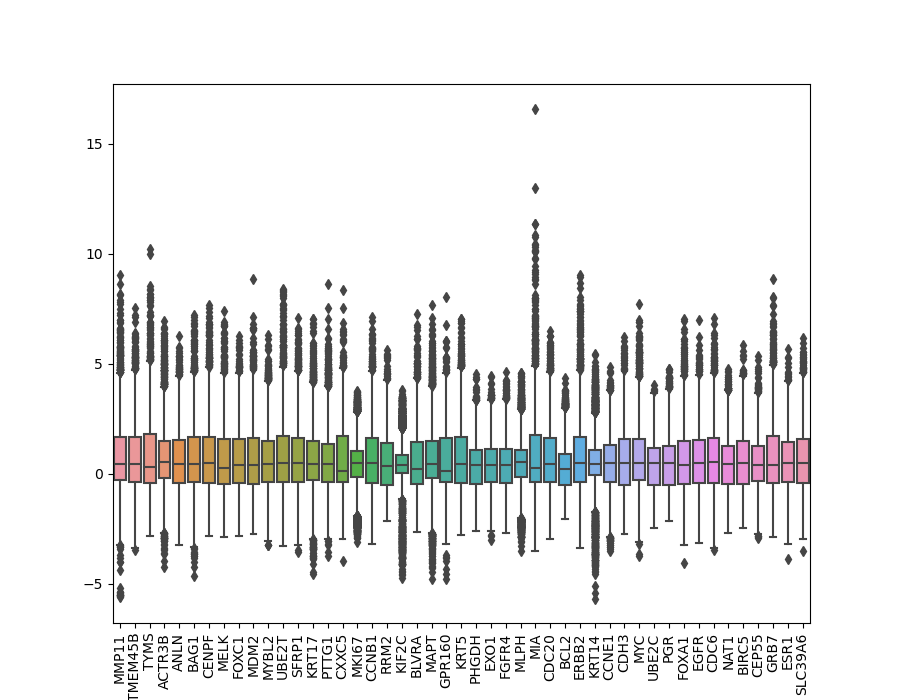

<AxesSubplot:>

In [60]:
print(provola.shape)
from matplotlib import pyplot
fig_dims = (9, 7)
fig, ax = pyplot.subplots(figsize=fig_dims)
ax.tick_params(axis='x', rotation=90)
sns.boxplot(data = provola)

Define model and selector

In [61]:
# Define possible models

# - tree-based models
model0 = preprocessing.StandardScaler() 
model0 |= tree.HoeffdingAdaptiveTreeClassifier(grace_period=100, split_confidence=1e-5,
                                               leaf_prediction='nb', nb_threshold=10, 
                                               seed=0)

model1 = preprocessing.StandardScaler() 
model1 |= tree.HoeffdingTreeClassifier(grace_period=100, split_confidence=1e-5, 
                                       leaf_prediction='nb', nb_threshold=10)

model2 = preprocessing.StandardScaler() 
model2 |= tree.ExtremelyFastDecisionTreeClassifier(grace_period=100, split_confidence=1e-5,
                                                   leaf_prediction='nb', nb_threshold=10,
                                                   min_samples_reevaluate=100)

# - ensemble-based models
model3 = preprocessing.StandardScaler() 
model3 |= ensemble.ADWINBaggingClassifier( 
            model=(preprocessing.StandardScaler() | 
                   tree.HoeffdingTreeClassifier(grace_period=50, split_confidence=1e-5,
                                                leaf_prediction='nb', nb_threshold=10)),
            n_models=10, seed=0)

model4 = preprocessing.StandardScaler() 
model4 |= ensemble.AdaptiveRandomForestClassifier(n_models=10, seed=0)

model5 = preprocessing.StandardScaler() 
model5 |= ensemble.AdaBoostClassifier(model=(tree.HoeffdingTreeClassifier(split_criterion='gini',
                                                                          split_confidence=1e-5,
                                                                          grace_period=2000)),
                                     n_models=5, seed=0)

# - lg-base models
model6 = preprocessing.StandardScaler() 
model6 |= multiclass.OneVsRestClassifier(linear_model.LogisticRegression(optimizer=optim.SGD(.1)))

# - KNN-based models
model7 = preprocessing.StandardScaler() 
model7 |= neighbors.KNNADWINClassifier(window_size=100)

model = model1

# Define the drif detector
adwin = ADWIN()

# Define the feature selectors

# - based on mutual information (univariate/filter method)
mi_selector = SelectKBest(mutual_info_classif, k = 100)

# - based on forward feature selection (wrapper method)

# - based the best important features according to embeeded methods
clf_lg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
clf_rf = RandomForestClassifier(random_state=0, n_estimators=10)
clf_gb = GradientBoostingClassifier(random_state=0)
sfm_selector = SelectFromModel(estimator=clf_lg) # max_features

# set the selector
selector = mi_selector

# Make a pipeline for feature selection
fs_proc = make_pipeline(StandardScaler(), selector)

Main script

In [62]:
random.seed(0)

# Define the metric to be evaluated
metric_ht = metrics.MacroF1() #BalancedAccuracy()
metric_ec = metrics.MacroF1() #BalancedAccuracy()

# set default biomarker
biomarker_opts = []

y_true = []
y_pred = []
ye_pred = []
all_ht = []
all_ec = []
drifts = []
feat_drifts = []

val_ec = 0
val_ht = 0

# Add the first model to the ensemble learning system
batch_models = []
feature_sets = []

C = 0
buffer = []
cnt_biomarker = None
for xi, yi in stream.iter_pandas(X_tot, Y_tot): #data
    
    buffer.append(C)
    
    # Select the features corresponding to the current biomarker
    xi = dict_filter(xi, biomarker_list)
  
    # Scale the features
    # xi_scaled = scaler.learn_one(xi).transform_one(xi)

    # Test the current model on the new "unobserved" sample
    yi_pred = model.predict_one(xi) 
    
    # Check if we have already included new classifiers
    if len(batch_models) == 0 :
        ye_pred.append(-1)
        all_ec.append(0)
    else :
        # Collect results from clf.predict calls
        
        if len(batch_models) > 1:
            preds = [clf.predict_proba(X_tot[fset].iloc[[C]]) for clf, fset in zip(batch_models[len(batch_models)-2:len(batch_models)],
                                                                                   feature_sets[len(feature_sets)-2:len(feature_sets)])]
        else:
            preds = [clf.predict_proba(X_tot[fset].iloc[[C]]) for clf, fset in zip(batch_models, feature_sets)]
        
        preds.append(dict2numpy(model.predict_proba_one(xi)))
        # Compile the average of the estimated class probabilities
        avgprob = np.average(np.asarray(preds), axis = 0)
        max_index_col = np.argmax(avgprob)
        pred = batch_models[0]['randomforestclassifier'].classes_[np.argmax(avgprob)]
        ye_pred.append(pred)
        # Update the metric
        val_ec = metric_ec.update(yi, pred)
        all_ec.append(val_ec.get())
    
    # Train the model with the new sample
    model.learn_one(xi, yi)

    # Store the truth and the prediction
    y_true.append(yi)
    y_pred.append(yi_pred)#y_pred.append(yi_pred[True])

    val_ht = metric_ht.update(yi, yi_pred)
    
    in_drift, in_warning = adwin.update(val_ht.get())
    if in_drift:
        print(f"Change detected at index {C}, input value: {val_ht.get()}")
        drifts.append(C)
        adwin.reset()   
        
    all_ht.append(val_ht.get())
    
    if C%50 == 0:
        print((val_ht,val_ec))
              
    if len(buffer) == 500:
        
        # define the training dataset
        fs_dat = X_tot.iloc[buffer,:]
        fs_y = Y_tot[buffer]
        
        print(collections.Counter(fs_y))
        
        # de-novo feature selection
        fs_proc.fit(fs_dat, fs_y)
        new_biomarker = fs_dat.columns[fs_proc['selectkbest'].get_support()]
        
        # check for feature drift detection
        if cnt_biomarker is None :
            setfeat = list(set.intersection(set(biomarker_list), set(new_biomarker)))
            test = len(setfeat) != len(biomarker_list)
        else :
            setfeat = list(set.intersection(set(cnt_biomarker), set(new_biomarker)))
            test = len(setfeat) != len(cnt_biomarker)
            
        if test == True :
            print(f"Feature drift detected at index {C}, intersection: {len(setfeat)}")
            print(set.intersection(set(biomarker_list), set(new_biomarker)))
            feat_drifts.append(C)
             
        # Define a new batch-based classifier
        cl_rf = RandomForestClassifier(n_estimators=500, oob_score = True,
                                       n_jobs=1, random_state=0,
                                       class_weight = "balanced")
        
        # Define the pipe
        clf_pipe = make_pipeline(StandardScaler(), cl_rf)
        
        # Define the evaluation process
        scoring = ['precision_macro', 'balanced_accuracy', 'f1_macro', 'f1_micro']
        cv_results = cross_validate(clf_pipe, fs_dat[new_biomarker], fs_y, cv=5, scoring=scoring) # scoring=scoring
        value_ba = np.mean(cv_results['test_balanced_accuracy'])
        value_f1mac = np.mean(cv_results['test_f1_macro'])
        value_f1mic = np.mean(cv_results['test_f1_micro'])
        print(f'For The New Feature Set* BA: {value_ba:.3f}')
        print(f'                         F1Ma: {value_f1mac:.3f}')
        print(f'                         F1Mi: {value_f1mic:.3f}')
        batch_models.append(clf_pipe)
        feature_sets.append(new_biomarker)
        
        # Train the new classifer
        clf_pipe.fit(fs_dat[new_biomarker], fs_y)
   
        # get importance
        importance = clf_pipe['randomforestclassifier'].feature_importances_
        sorted_indices = np.argsort(importance)[::-1]
        print(*fs_dat[new_biomarker].columns[sorted_indices[:10]], sep = "\n") # the top 10 ranked genes
        
        #cnt_biomarker = list(set.union(set(new_biomarker), set(cnt_biomarker)))
        cnt_biomarker = new_biomarker
        
        # reset the buffer
        buffer = []

    C = C + 1
    

(MacroF1: 0., 0)
(MacroF1: 0.173565, 0)
(MacroF1: 0.418576, 0)
(MacroF1: 0.460834, 0)
(MacroF1: 0.471307, 0)
Change detected at index 223, input value: 0.4858589512995147
(MacroF1: 0.488574, 0)
(MacroF1: 0.50734, 0)
(MacroF1: 0.528574, 0)
(MacroF1: 0.535133, 0)
(MacroF1: 0.532903, 0)
Counter({0: 288, 1: 100, 2: 53, 3: 43, 4: 16})
Feature drift detected at index 499, intersection: 20
{'ANLN', 'MYBL2', 'MELK', 'FOXC1', 'SFRP1', 'PTTG1', 'MKI67', 'RRM2', 'KIF2C', 'MAPT', 'MLPH', 'CDC20', 'CCNE1', 'UBE2C', 'FOXA1', 'NAT1', 'BIRC5', 'CEP55', 'ESR1', 'SLC39A6'}
For The New Feature Set* BA: 0.691
                         F1Ma: 0.704
                         F1Mi: 0.878
FOXA1
ESR1
SFRP1
MLPH
CRYAB
FOXC1
GABRP
SPDEF
RERG
XBP1
(MacroF1: 0.548603, MacroF1: 1.)
(MacroF1: 0.558472, MacroF1: 0.796397)
(MacroF1: 0.581474, MacroF1: 0.85351)
(MacroF1: 0.596764, MacroF1: 0.846477)
(MacroF1: 0.612555, MacroF1: 0.843274)
(MacroF1: 0.610507, MacroF1: 0.828275)
Change detected at index 767, input value: 0.6


(dot.exe:13412): Pango-WARNING **: couldn't load font "trebuchet Not-Rotated 11", falling back to "Sans Not-Rotated 11", expect ugly output.


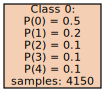

In [63]:
#model['HoeffdingAdaptiveTreeClassifier'].draw()
model['HoeffdingTreeClassifier'].draw()
#model['ExtremelyFastDecisionTreeClassifier'].draw()
#model['KNNADWINClassifier']
#model['ADWINBaggingClassifier']

In [64]:
all_feats = list(set().union(*[set(f.tolist()) for f in feature_sets]))
len(all_feats)

250

In [65]:
all_feats

['GINS1',
 'SHCBP1',
 'LONRF2',
 'MYB',
 'TENC1',
 'E2F2',
 'CKS1B',
 'TCEAL1',
 'ROPN1B',
 'MICALL1',
 'E2F1',
 'PARD6B',
 'CELSR1',
 'FAM83D',
 'TCF19',
 'RABEP1',
 'RARA',
 'WWP1',
 'IFRD1',
 'C6orf211',
 'SPAG5',
 'MYBL2',
 'CDC25A',
 'ANKRD42',
 'APH1B',
 'IGF1R',
 'UBE2T',
 'KIFC1',
 'STIL',
 'CCDC96',
 'KRT5',
 'TCEAL4',
 'SPTBN4',
 'MPP6',
 'DYNLRB2',
 'ABCC8',
 'KIF15',
 'PLK1',
 'NUDT12',
 'RUNDC1',
 'CCNE1',
 'WDR19',
 'DEGS2',
 'CDC45',
 'ERBB4',
 'ZMYND10',
 'CDCA7',
 'CDK1',
 'CT62',
 'AR',
 'MCM10',
 'FZD9',
 'TTLL4',
 'NEK2',
 'MELK',
 'ACADSB',
 'CCDC125',
 'FSIP1',
 'LRRC46',
 'CCNB1',
 'CCNA2',
 'RAD51',
 'TRIM29',
 'PRC1',
 'RAD51AP1',
 'YBX1',
 'TROAP',
 'ARSG',
 'PDSS1',
 'FAM174A',
 'RGMA',
 'SUSD3',
 'CDC20',
 'ESPL1',
 'SGOL1',
 'SCN4B',
 'THSD4',
 'FOXA1',
 'PGR',
 'SCUBE2',
 'DEPDC1B',
 'PTPRT',
 'CCNB2',
 'ANLN',
 'GABRP',
 'CDCA8',
 'SKA3',
 'RHOB',
 'CENPI',
 'RAD54L',
 'C9orf116',
 'CDCA5',
 'MAPT',
 'GSG2',
 'GTSE1',
 'LEPREL1',
 'ANKRA2',
 'CRYAB',
 'PS

In [66]:
print(f'Balanced Accuracy*: {sk.metrics.balanced_accuracy_score(y_true[500:len(y_true)], y_pred[500:len(y_pred)]):.3f}')
print(f'Balanced Accuracy*: {sk.metrics.balanced_accuracy_score(y_true[500:len(y_true)], ye_pred[500:len(ye_pred)]):.3f}')

Balanced Accuracy*: 0.773
Balanced Accuracy*: 0.775


In [67]:
print(f'F1 score*: {sk.metrics.f1_score(y_true[500:len(y_true)], y_pred[500:len(y_pred)], average = "micro"):.3f}')
print(f'F1 score*: {sk.metrics.f1_score(y_true[500:len(y_true)], ye_pred[500:len(ye_pred)], average = "micro"):.3f}')

F1 score*: 0.743
F1 score*: 0.786


In [68]:
from sklearn import metrics

print(metrics.confusion_matrix(y_true[500:len(y_true)], y_pred[500:len(y_pred)]))
print("-----------------------------")
print(metrics.confusion_matrix(y_true[500:len(y_true)], ye_pred[500:len(ye_pred)]))

[[1168  414   15  101  114]
 [  33  698   19   54    0]
 [   2   33  257   43    1]
 [   0    4   14  443   11]
 [  23   10   15   31  147]]
-----------------------------
[[1348  321   13   94   36]
 [  47  691   13   53    0]
 [   2   40  254   39    1]
 [   0    4   14  446    8]
 [  43   11   13   30  129]]


In [69]:
drifts

[223, 767, 2527, 3583]

<IPython.core.display.Javascript object>


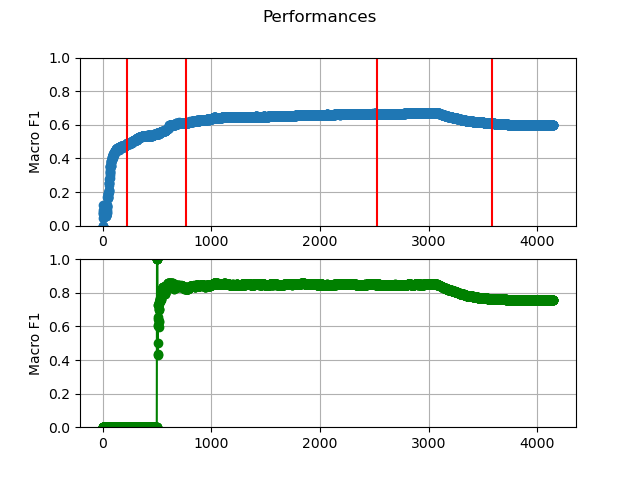

In [70]:
import numpy as np
import matplotlib.pyplot as plt

x1 = list(range(0, len(all_ht)))
x2 = list(range(0, len(all_ec)))

y1 = all_ht
y2 = all_ec

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('Performances')

ax1.plot(x1, y1, 'o-')
ax1.set_ylabel('Macro F1')
ax1.set_ylim([0, 1])
ax1.grid()

for drift_detected in drifts:
    ax1.axvline(drift_detected, color='red')

ax2.plot(x2, y2, 'o-', color='green')
ax2.set_ylabel('Macro F1')
ax2.set_ylim([0, 1])
ax2.grid()

plt.show()